In [1]:
import pandas as pd
from textblob import TextBlob, Word, Blobber
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in pre-election headlines data
headlines_pre = pd.read_csv('religious_headlines_pre.csv')
headlines_pre = pd.DataFrame(headlines_pre)
headlines_pre.shape

(22509, 3)

In [3]:
# Read in post-election headlines data
headlines_post = pd.read_csv('religious_headlines_post.csv')
headlines_post = pd.DataFrame(headlines_post)
headlines_post.shape

(16559, 3)

In [4]:
def detect_polarity(text):
    '''
    Applies sentiment analysis to a piece of text.
    Returns polarity with 1 as pos and 0 as neg.
    '''
    return TextBlob(text).sentiment.polarity

In [5]:
# Find polarity of each headline in pre-election dataset
polarity_pre = []
for i in range(headlines_pre.shape[0]):
    polarity_pre.append(detect_polarity(headlines_pre.iloc[i,2]))

len(polarity_pre)

22509

In [6]:
# Find polarity of each headline in post-election dataset
polarity_post = []
for i in range(headlines_post.shape[0]):
    polarity_post.append(detect_polarity(headlines_post.iloc[i,2]))
len(polarity_post)

16559

In [7]:
# Add polarity scores to dataframe
headlines_pre['Polarity'] = polarity_pre
headlines_post['Polarity'] = polarity_post

In [8]:
print('Pre-Election Average Sentiment', headlines_pre['Polarity'].mean())
print('Post-Election Average Sentiment', headlines_post['Polarity'].mean())

Pre-Election Average Sentiment 0.018221962807317686
Post-Election Average Sentiment 0.01956247873249208


In [13]:
headlines_pre['Election'] = "Pre"
headlines_post['Election'] = "Post"

# Combine pre and post headlines into one dataframe
all_headlines = pd.concat([headlines_pre, headlines_post])

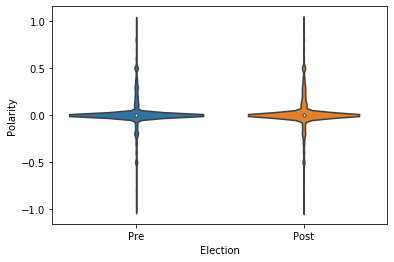

In [22]:
sns.violinplot(y='Polarity', x='Election', data=all_headlines)
#all_headlines.boxplot(by =['Election'], column =['Polarity'])

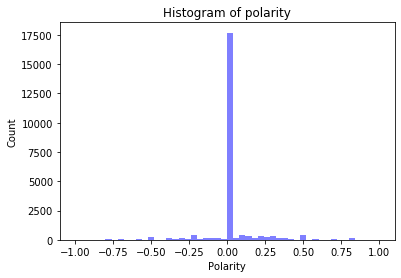

In [23]:
num_bins = 50
n, bins, patches = plt.hist(headlines_pre.Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

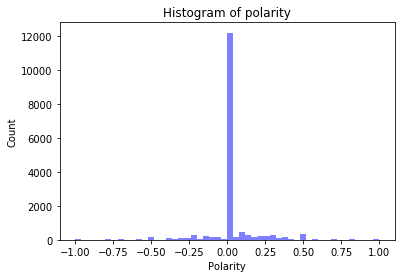

In [24]:
num_bins = 50
n, bins, patches = plt.hist(headlines_post.Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show()

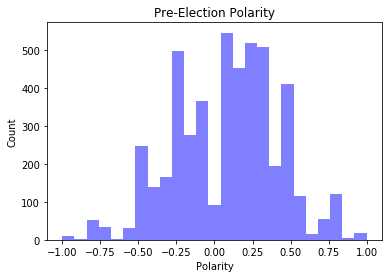

In [27]:
filter_pre = headlines_pre[headlines_pre['Polarity']!=0] #remove 0s to get a clearer picture

num_bins = 25
n, bins, patches = plt.hist(filter_pre.Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Pre-Election Polarity')
plt.show()

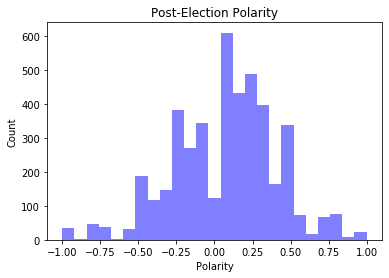

In [28]:
filter_post = headlines_post[headlines_post['Polarity']!=0] #remove 0s to get a clearer picture

num_bins = 25
n, bins, patches = plt.hist(filter_post.Polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Post-Election Polarity')
plt.show()